In [1]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

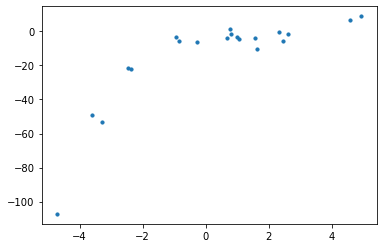

In [2]:
# Create fake data
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
plt.scatter(x,y, s=10)
plt.show()

In [3]:
# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]
print(x.shape)
print(y.shape)

(20, 1)
(20, 1)


In [4]:
# Select the polinomial order to fit
polynomial_features = PolynomialFeatures(degree = 3)
x_poly = polynomial_features.fit_transform(x)

In [5]:
# Select a linear model
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

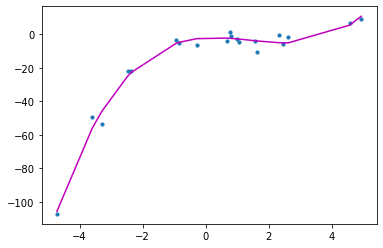

In [6]:
# Plot prediction
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [7]:
# Visualize the quality of the fit
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

28.31540558613017
-0.14471974265772625
